## Численные методы. Задание 3.3
#### Козловский А.А., гр. 2253
#### Вариант 5

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display

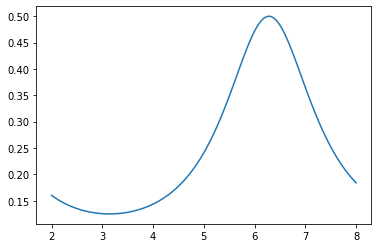

In [4]:
f = lambda x: 1 / (5 - 3 * np.cos(x))
a, b = 2, 8
x = np.linspace(a, b, 100)

plt.plot(x, f(x))
plt.show()

In [5]:
def make_value_table(start, end, count, f):
    """Функция для построения таблицы узлов
    start: левая граница интервала
    end: правая граница интервала
    count: количество узлов
    f: функция
    returns: таблицу узлов"""
    x_table = np.linspace(start, end, count)
    y_table = np.array([f(x) for x in x_table])
    
    result = np.concatenate(([x_table], [y_table]))
    return result

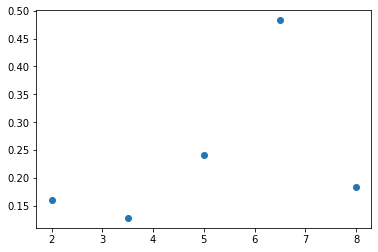

In [6]:
table_count = 5
value_table = make_value_table(a, b, table_count, f)

plt.scatter(value_table[0], value_table[1])
plt.show()

In [7]:
df_table = pd.DataFrame(columns=[f'x{i}' 
                                 for i, _ in enumerate(value_table.T)],
                        index=['x', 'f(x)'], data=value_table)
display(df_table)

,x0,x1,x2,x3,x4
x,2.00000,3.500000,5.000000,6.500000,8.000000
f(x),0.16004,0.128051,0.241021,0.483036,0.183942


### Интерполяция параболическим сплайном
Для интерполяции параболических сплайном мы должны найти коэффициенты многочленов 2 степени, причем количество этих многочленов будет равно количеству узлов интерполяции - 1. На каждом промежутке между двумя узлами у нас свой многочлен. То есть, иными словами нам необходимо найти $(n + 1) \cdot (m - 1)$ неизвестных, где n - степень многочленов, а m - количество узлов интерполяции. Теперь нам необходимо воспользоваться некоторыми условиями, чтобы составить СЛАУ для нахождения этих коэффицинетов.
#### Условия интерполяции и непрерывности
По условиям интерполяции - сплайны должны проходить через узлы интерполяции, то есть:
$$\begin{cases}
S_{i}(x_{i}) = f_{i} \\
S_{i}(x_{i + 1}) = f_{i + 1}
\end{cases}$$

Так как у нас m узлов интерполяции m-1 сплайнов, то в итоге получается $2m - 2$ условий

#### Условия гладкости
Для обеспечения гладкости мы должны потребовать, чтобы значение производной на границе сплайнов должно быть одинковым для многочлена первого и второго сплайна.
$$S'_{i}(x_{i}) = S'_{i + 1}(x_{i})$$
Таких условий у нас получается $m - 2$, так как именно столько узлов, где граничат сплайны

#### Дополнительные условия
В данном случае мы рассматриваем параболический сплайн. Посчитаем, сколько уравнений нам требуется, для того, чтобы можно было решить соответствующую СЛАУ. $(2 + 1) \cdot (m - 1) = 3m - 3$
А пока у нас имеется $3m - 4$ условия. Для этого используют граничное условие. В нашем случае мы будем использовать $S'_{1}(x_{1}) = 0$


В результате получаем СЛАУ:
$$\begin{equation}
\begin{pmatrix} 0 \\ 0 \\ f_{1} \\ f_{2} \\ 0 \\ f_{2} \\ f{3} \\ ...
\end{pmatrix}=\begin{pmatrix}
0 & 1 & 2x_{1} & 0 & 0 & 0 & ... & 0 \\
0 & 1 & 2x_{1} & 0 & -1 & -2x_{1} & ... & 0 \\
1 & x_{1} & x_{1}^{2} & 0 & 0 & 0 & ... & 0 \\
1 & x_{2} & x_{2}^{2} & 0 & 0 & 0 & ... & 0 \\
0 & 0 & 0 & 0 & 1 & 2x_{1} & ... & 0 \\
0 & 0 & 0 & 1 & x_{2} & x_{2}^{2} & ... & 0 \\
0 & 0 & 0 & 1 & x_{3} & x_{3}^{2} & ... & 0 \\
&&&&& ... & \\
\end{pmatrix}  \begin{pmatrix} a_{1} \\ b_{1} \\ c_{1} \\ a_{2} \\ b_{2} \\ c_{2} \\ a{3} \\ ...
\end{pmatrix}
\end{equation}$$ 


### Интерполяция кубическим сплайном
Интерполяция кубическим сплайном очень похожа на предыдущий случай, только для получение решаемой СЛАУ необходимо добавить ещё одно уравнений. В нашем случае речь идет о естественном сплайне, а у него по определению на правом и левом конце производные равны нулю, то есть, если у нас m отрезков, то
$$\begin{cases}
S'_{1} = 0 \\
S'_{m} = 0
\end{cases}$$
У нас уже было условие, что $S'_{1} = 0$, так что добавляем одно условие и матрица коэффициентов становится квадратной и  СЛАУ имеет вид:

$$\begin{equation}
\begin{pmatrix} 0 \\ 0 \\ f_{1} \\ f_{2} \\ 0 \\ f_{2} \\ f{3} \\ ...
\end{pmatrix}=\begin{pmatrix}
0 & 1 & 2x_{1} & 3x_{1}^{2} & 0 & 0 & 0 & ... & 0 \\
0 & 1 & 2x_{1} & 3x_{1}^{2} & 0 & -1 & -2x_{1} & ... & 0 \\
1 & x_{1} & x_{1}^{2} & x_{1}^{3} & 0 & 0 & 0 & ... & 0 \\
1 & x_{2} & x_{2}^{2} & x_{2}^{3} & 0 & 0 & 0 &... & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 2x_{2} & 3x_{2}^{2} ... & 0 \\
0 & 0 & 0 & 1 & x_{2} & x_{2}^{2} & 0 & ... & 0 \\
0 & 0 & 0 & 1 & x_{3} & x_{3}^{2} & 0 &... & 0 \\
&&&&& ... & \\
\end{pmatrix}  \begin{pmatrix} a_{1} \\ b_{1} \\ c_{1} \\ a_{2} \\ b_{2} \\ c_{2} \\ a{3} \\ ...
\end{pmatrix}
\end{equation}$$ 

Теперь напишем функцию, которая будет возвращать матрицу коэффициенту и вектор свободных переменных для дальнейшего решения слау и интерполяции сплайнами

In [90]:
def make_pspline(table, degree):
    """Функция для построения полиномиального сплайна
    table: таблица узлов
    degree: степень многочлена"""
    pot_koef = np.zeros((degree, table.shape[1] - 1))
    matrix = []
    free_values = []
    
    if degree > 1:
        eq = np.array([k * table[0][0] ** (k - 1) for k in range(degree + 1)])
        after = np.array([0 for _ in range((degree + 1) * (table.shape[1] - 2))])
        row = np.concatenate((eq, after))
        matrix.append(row)
        free_values.append(0)
        
    if degree > 2:
        eq = np.array([k * table[0][-1] ** (k - 1) for k in range(degree + 1)])
        row = np.concatenate((after, eq))
        matrix.append(row)
        free_values.append(0)
    
    for i in range(table.shape[1] - 1):
        if i != table.shape[1] - 2:
            if degree > 1:
                eq1 = np.array([k * table[0][i + 1] ** (k - 1) for k in range(degree+1)])
                eq2 = -eq1
                before = np.array([0 for _ in range((degree + 1) * i)])
                after = np.array([0 for _ in range((degree + 1) * (i + 2), (degree + 1) * (table.shape[1] - 1))])
                row = np.concatenate((before, eq1, eq2, after))
                matrix.append(row)
                free_values.append(0)
            if degree > 2:
                eq1 = np.array([k * (k - 1) * table[0][i + 1] ** (k - 2) for k in range(degree+1)])
                eq2 = -eq1
                row = np.concatenate((before, eq1, eq2, after))
                matrix.append(row)
                free_values.append(0)
        for j in range(2):
            eq_1 = np.array([table[0][i + j] ** k for k in range(degree+1)])
            mat_current = np.array([eq_1[i] for i in range(degree+1)])

            before_current = np.array([0 for _ in range((degree + 1) * i)])
            after_current = np.array([0 for _ in range((degree + 1) * (i + 1), 
                                                       (degree + 1) * (table.shape[1] - 1))])

            current_row = np.concatenate((before_current, mat_current, after_current))
            matrix.append(current_row)
            free_values.append(table[1][i + j])
        
    return np.array(matrix), np.array(free_values)

In [154]:
def plot_spline(spline, table, degree, subplots, color='red'):
    """Функция для построение сплайнов
    spline: вектор коэффициентов многочленов сплайнов
    table: таблица узлов интерполяции
    degree: степень многочленов
    subplots: fig, ax для matplotlib
    color: цвет, которым будут окрашены сплайны"""
    fig, ax = subplots
    for i in range(table.shape[1] - 1):
        s = lambda x: np.sum([spline[i * (degree + 1) + k] * (x ** k) 
                              for k in range(degree + 1)])
        x = np.linspace(table[0][i], table[0][i + 1], 50)
        
        if i == 0:
            ax.plot(x, [s(x_) for x_ in x], color=color, label=f'Сплайны {degree} степени')
            ax.legend()
        else:
            ax.plot(x, [s(x_) for x_ in x], color=color)

In [152]:
spline2 = np.linalg.solve(*make_pspline(value_table, 2))
spline3 = np.linalg.solve(*make_pspline(value_table, 3))

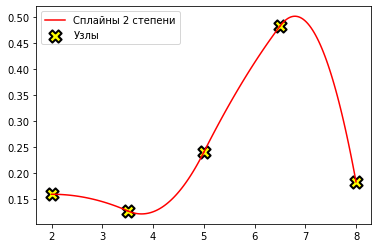

In [160]:
fig, ax = plt.subplots()
plot_spline(spline2, value_table, 2, (fig, ax))
ax.scatter(value_table[0], value_table[1], marker='X', s=150,
           c='yellow', linewidth=2, edgecolor='black', label='Узлы')
ax.legend()
plt.show()

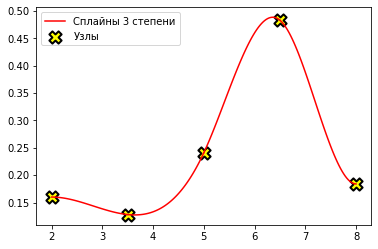

In [161]:
fig, ax = plt.subplots()
plot_spline(spline3, value_table, 3, (fig, ax))
ax.scatter(value_table[0], value_table[1], marker='X', s=150,
           c='yellow', linewidth=2, edgecolor='black', label='Узлы')
ax.legend()
plt.show()

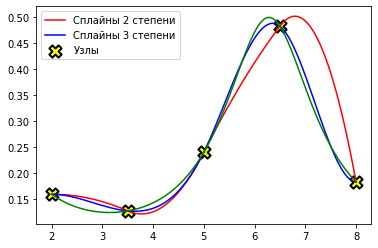

In [162]:
fig, ax = plt.subplots()
plot_spline(spline, value_table, 2, (fig, ax), color='red')
plot_spline(spline3, value_table, 3, (fig, ax), color='blue')
ax.plot(x, f(x), color='green')
ax.scatter(value_table[0], value_table[1], marker='X', s=150,
           c='yellow', linewidth=2, edgecolor='black', label='Узлы')
ax.legend()
plt.show()

Как мы видим, интерполяция кубическими сплайнами проходит лучше. Это обусловлено тем, что каждый отдельный сплайн 2 степени дает нам кривизну одного знака (если мы возьмем вторую производную, то знак ее на всем отрезке будет постоянный). То есть, функция на каждом отрезке будет выпуклой строго либо вниз, либо вверх. Кубические же сплайны дают возможность на одном отрезке быть и выпуклым и вогнутым, что, конечно же, дает более хорошие результаты. 